In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
!ls

 Beer_Dataset2.csv		   XGBoost-Copy1.ipynb
'Comparing top 20 results.ipynb'   XGBoost.ipynb
'Data Preprocessing.ipynb'	   beer2-updated.csv
 LASSO-Copy1.ipynb		   beer2.csv
 LASSO.ipynb			   beer2_ds.csv
 LightGBM-Copy1.ipynb		   beer_ds.csv
 LightGBM.ipynb			   top_20_rf.csv
 Presentation			   top_20_xg.csv
'Previous Work'			  'updated dataset.ipynb'
'Random Forest.ipynb'		  'updated_ds_Random Forest.ipynb'


In [6]:
# Load top features from Random Forest
top_20_rf = pd.read_csv('top_20_rf.csv')

# Load top features from XGBoost
top_20_xgb = pd.read_csv('top_20_xgb.csv')


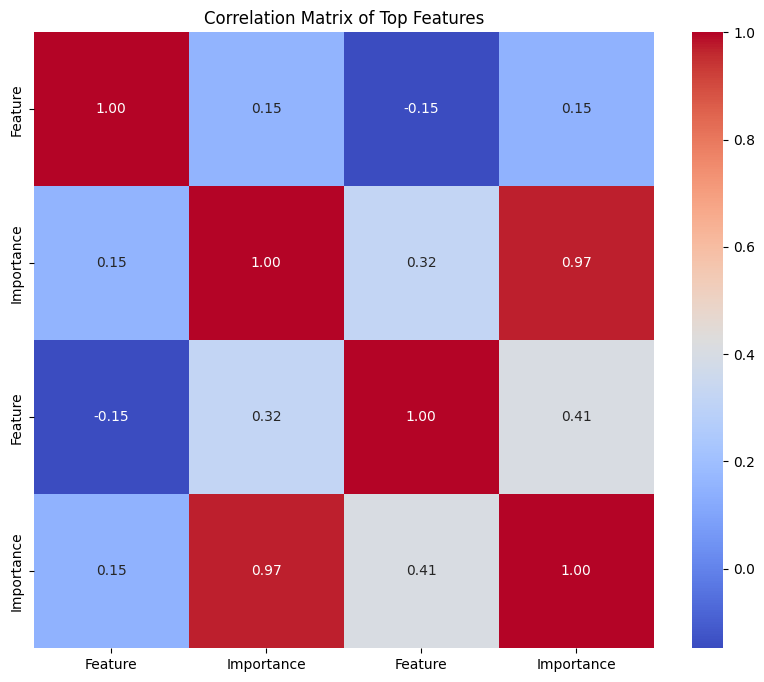

In [7]:
top_features_combined = pd.concat([top_20_rf, top_20_xgb], axis=1)

# Compute correlation matrix
correlation_matrix = top_features_combined.corr()

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Top Features')
plt.show()


In [12]:
top_20_rf_features = set(top_20_rf['Feature'])
top_20_xgb_features = set(top_20_xgb['Feature'])
common_features = top_20_rf_features.intersection(top_20_xgb_features)
print("Common Features:", common_features)


Common Features: {756, 1614, 2007}


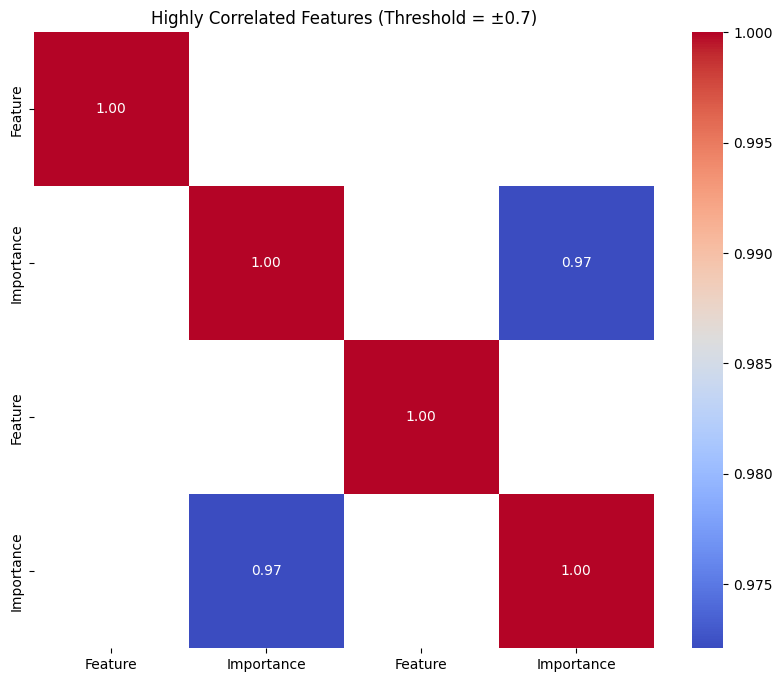

In [14]:
# Set threshold for highlighting highly correlated pairs
threshold = 0.7

# Filter correlation matrix to show only highly correlated pairs
highly_correlated = correlation_matrix[(correlation_matrix >= threshold) | (correlation_matrix <= -threshold)]

# Visualize highly correlated pairs
plt.figure(figsize=(10, 8))
sns.heatmap(highly_correlated, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Highly Correlated Features (Threshold = ±0.7)')
plt.show()


In [20]:
print(top_20_rf)

    Feature  Importance
0      1209    0.017253
1      1075    0.016042
2      1990    0.014805
3      1148    0.014537
4      2551    0.012954
5      1945    0.012255
6      1614    0.011090
7      1042    0.010280
8      1520    0.010150
9      1045    0.008764
10     2007    0.008736
11      369    0.008098
12     1682    0.007954
13     1405    0.007941
14      667    0.007851
15     2035    0.007728
16     1180    0.007690
17     2054    0.007540
18      756    0.007485
19     1185    0.007461


In [19]:
print(top_20_xgb)

    Feature  Importance
0      1726    0.157567
1      2007    0.131929
2      2099    0.121576
3       637    0.081573
4        23    0.081520
5       587    0.080787
6        91    0.079547
7      2618    0.070465
8      1614    0.038972
9      2646    0.035952
10      756    0.035626
11      478    0.023927
12      687    0.021030
13     2008    0.016204
14      903    0.009194
15     1202    0.007856
16        2    0.002427
17       21    0.001593
18        0    0.001179
19       52    0.001075


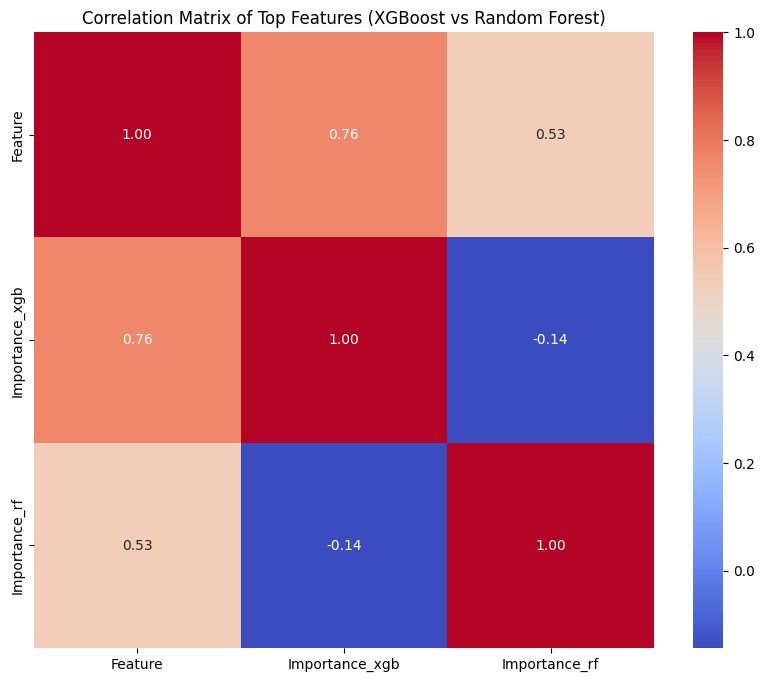

In [22]:
import pandas as pd

# Assuming you have 'top_20_xgb' and 'top_20_rf' datasets loaded as DataFrames

# Merge the two datasets on the 'Feature' column
merged_df = pd.merge(top_20_xgb, top_20_rf, on='Feature', suffixes=('_xgb', '_rf'))

# Compute the correlation matrix
correlation_matrix = merged_df.corr()

# Visualize the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Top Features (XGBoost vs Random Forest)')
plt.show()
